### Basic Checks

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.describe(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Encoding

In [9]:
data = pd.get_dummies(df.Sex, prefix='Gender', drop_first = True)
df = pd.concat([data,df],axis = 1)
df.drop(columns='Sex',inplace = True)

In [10]:
df

,Gender_M,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,40,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,False,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,True,37,ATA,130,283,0,ST,98,N,0.0,Up,0
3,False,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,True,54,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,True,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,True,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,False,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
data = pd.get_dummies(df.ChestPainType, prefix="ChestPain", drop_first=True)
df = pd.concat([data,df], axis=1)
df.drop(columns='ChestPainType', inplace=True)

In [12]:
df

,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,False,False,True,40,140,289,0,Normal,172,N,0.0,Up,0
1,False,True,False,False,49,160,180,0,Normal,156,N,1.0,Flat,1
2,True,False,False,True,37,130,283,0,ST,98,N,0.0,Up,0
3,False,False,False,False,48,138,214,0,Normal,108,Y,1.5,Flat,1
4,False,True,False,True,54,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,True,True,45,110,264,0,Normal,132,N,1.2,Flat,1
914,False,False,False,True,68,144,193,1,Normal,141,N,3.4,Flat,1
915,False,False,False,True,57,130,131,0,Normal,115,Y,1.2,Flat,1
916,True,False,False,False,57,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
data = pd.get_dummies(df.RestingECG, prefix='RestingECG', drop_first=True)
df = pd.concat([data,df], axis=1)
df.drop(columns='RestingECG', inplace=True)

In [14]:
df

,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,True,False,True,False,False,True,40,140,289,0,172,N,0.0,Up,0
1,True,False,False,True,False,False,49,160,180,0,156,N,1.0,Flat,1
2,False,True,True,False,False,True,37,130,283,0,98,N,0.0,Up,0
3,True,False,False,False,False,False,48,138,214,0,108,Y,1.5,Flat,1
4,True,False,False,True,False,True,54,150,195,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,False,True,True,45,110,264,0,132,N,1.2,Flat,1
914,True,False,False,False,False,True,68,144,193,1,141,N,3.4,Flat,1
915,True,False,False,False,False,True,57,130,131,0,115,Y,1.2,Flat,1
916,False,False,True,False,False,False,57,130,236,0,174,N,0.0,Flat,1


In [15]:
data = pd.get_dummies(df.ExerciseAngina, prefix='ExerciseAngina', drop_first=True)
df = pd.concat([data,df], axis=1)
df.drop(columns='ExerciseAngina', inplace=True)

In [16]:
df

,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,False,True,False,True,False,False,True,40,140,289,0,172,0.0,Up,0
1,False,True,False,False,True,False,False,49,160,180,0,156,1.0,Flat,1
2,False,False,True,True,False,False,True,37,130,283,0,98,0.0,Up,0
3,True,True,False,False,False,False,False,48,138,214,0,108,1.5,Flat,1
4,False,True,False,False,True,False,True,54,150,195,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,True,False,False,False,True,True,45,110,264,0,132,1.2,Flat,1
914,False,True,False,False,False,False,True,68,144,193,1,141,3.4,Flat,1
915,True,True,False,False,False,False,True,57,130,131,0,115,1.2,Flat,1
916,False,False,False,True,False,False,False,57,130,236,0,174,0.0,Flat,1


In [17]:
data = pd.get_dummies(df.ST_Slope, prefix='ST_Slope', drop_first=True)
df = pd.concat([data,df], axis=1)
df.drop(columns='ST_Slope', inplace=True)

In [18]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


### Outliers Handling

In [19]:
from scipy import stats
import numpy as np

In [20]:
l = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
for i in l:
    print(i)
    print()
    IQR = stats.iqr(df[i])
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    print(Q1)
    print(Q3)
    LB = Q1 - 1.5*(IQR)
    UB = Q3 + 1.5*(IQR)
    print(LB)
    print(UB)
    print(df[(df[i]>LB) & (df[i]<UB)])
    print()
    print("Beyond Upper bound:")
    print(df.loc[df[i]>UB,i])
    print()
    print("Below Lower bound:")
    print(df.loc[df[i]<LB,i])
    print()

Age

47.0
60.0
27.5
79.5
     ST_Slope_Flat  ST_Slope_Up  ExerciseAngina_Y  RestingECG_Normal  \
0            False         True             False               True   
1             True        False             False               True   
2            False         True             False              False   
3             True        False              True               True   
4            False         True             False               True   
..             ...          ...               ...                ...   
913           True        False             False               True   
914           True        False             False               True   
915           True        False              True               True   
916           True        False             False              False   
917          False         True             False               True   

     RestingECG_ST  ChestPain_ATA  ChestPain_NAP  ChestPain_TA  Gender_M  Age  \
0            False           

##### Age

In [21]:
stats.iqr(df.Age)

13.0

In [22]:
IQR_Age = stats.iqr(df.Age)

In [23]:
import numpy as np

In [24]:
Q1_Age = np.percentile(df.Age, 25)
Q3_Age = np.percentile(df.Age, 75)
print(Q1_Age)
print(Q3_Age)

47.0
60.0


In [25]:
Q1_Age - 1.5*(IQR_Age)

27.5

In [26]:
Q3_Age + 1.5*(IQR_Age)

79.5

In [27]:
LB_Age = Q1_Age - 1.5*(IQR_Age)
UB_Age = Q3_Age + 1.5*(IQR_Age)

In [28]:
df[(df.Age>LB_Age) & (df.Age<UB_Age)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [29]:
df.loc[df.Age>UB_Age,'Age']

Series([], Name: Age, dtype: int64)

In [30]:
df.loc[df.Age<LB_Age,'Age']

Series([], Name: Age, dtype: int64)

##### RestingBP

In [31]:
stats.iqr(df.RestingBP)

20.0

In [32]:
IQR_RestingBP = stats.iqr(df.RestingBP)

In [33]:
Q1_RestingBP = np.percentile(df.RestingBP, 25)
Q3_RestingBP = np.percentile(df.RestingBP, 75)
print(Q1_RestingBP)
print(Q3_RestingBP)

120.0
140.0


In [34]:
LB_RestingBP = Q1_RestingBP - 1.5*(IQR_RestingBP)
UB_RestingBP = Q3_RestingBP + 1.5*(IQR_RestingBP)
print(LB_RestingBP)
print(UB_RestingBP)

90.0
170.0


In [35]:
df[(df.RestingBP>LB_RestingBP) & (df.RestingBP<UB_RestingBP)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [36]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']

109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

In [37]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']

314    80
449     0
Name: RestingBP, dtype: int64

In [38]:
import seaborn as sns

<Axes: xlabel='RestingBP'>

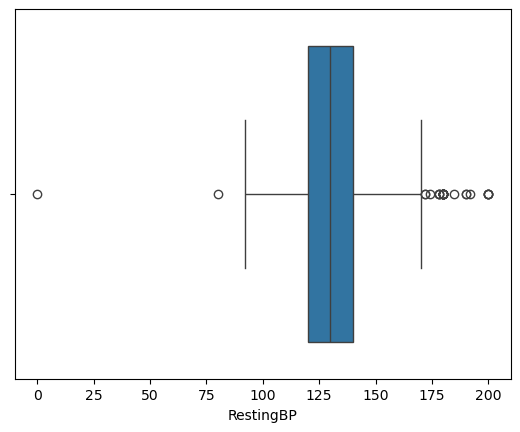

In [39]:
sns.boxplot(x = df.RestingBP)

In [40]:
((918-876)/918)*100

4.57516339869281

In [41]:
df.RestingBP.median()

130.0

In [42]:
df.loc[df.RestingBP > UB_RestingBP, 'RestingBP'] = 130

In [43]:
df.loc[df.RestingBP < LB_RestingBP, 'RestingBP'] = 130

In [44]:
df.loc[df.RestingBP > UB_RestingBP, 'RestingBP']

Series([], Name: RestingBP, dtype: int64)

In [45]:
df.loc[df.RestingBP < LB_RestingBP, 'RestingBP']

Series([], Name: RestingBP, dtype: int64)

<Axes: xlabel='RestingBP'>

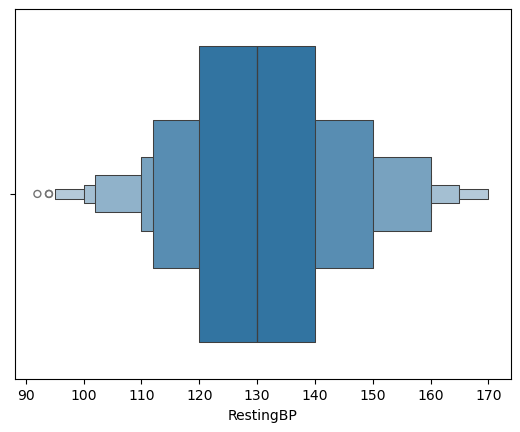

In [46]:
sns.boxenplot(x = df.RestingBP)

##### Cholesterol

In [47]:
stats.iqr(df.Cholesterol)

93.75

In [48]:
IQR_Cholesterol = stats.iqr(df.Cholesterol)

In [49]:
Q1_Cholesterol = np.percentile(df.Cholesterol, 25)
Q3_Cholesterol = np.percentile(df.Cholesterol, 75)
print(Q1_Cholesterol)
print(Q3_Cholesterol)

173.25
267.0


In [50]:
LB_Cholesterol = Q1_Cholesterol - 1.5*(IQR_Cholesterol)
UB_Cholesterol = Q3_Cholesterol + 1.5*(IQR_Cholesterol)
print(LB_Cholesterol)
print(UB_Cholesterol)

32.625
407.625


In [51]:
df[(df.Cholesterol>LB_Cholesterol) & (df.Cholesterol<UB_Cholesterol)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [52]:
((918-735)/918)*100

19.934640522875817

##### FastingBS

In [53]:
stats.iqr(df.FastingBS)

0.0

##### MaxHR

In [54]:
stats.iqr(df.MaxHR)

36.0

In [55]:
IQR_MaxHR = stats.iqr(df.MaxHR)

In [56]:
Q1_MaxHR = np.percentile(df.MaxHR, 25)
Q3_MaxHR = np.percentile(df.MaxHR, 75)
print(Q1_MaxHR)
print(Q3_MaxHR)

120.0
156.0


In [57]:
LB_MaxHR = Q1_MaxHR - 1.5*(IQR_MaxHR)
UB_MaxHR = Q3_MaxHR + 1.5*(IQR_MaxHR)
print(LB_MaxHR)
print(UB_MaxHR)

66.0
210.0


In [58]:
df[(df.MaxHR>LB_MaxHR) & (df.MaxHR<UB_MaxHR)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [59]:
(2/918)*100

0.2178649237472767

<Axes: ylabel='MaxHR'>

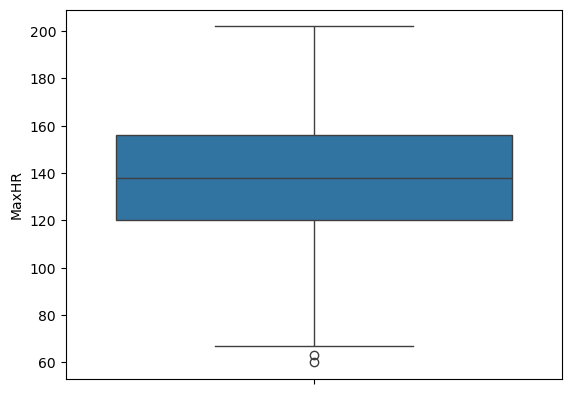

In [60]:
sns.boxplot(df.MaxHR)

In [61]:
df.MaxHR.median()

138.0

In [62]:
df.loc[df.MaxHR > UB_MaxHR, 'MaxHR'] = 138

In [63]:
df.loc[df.MaxHR < LB_MaxHR, 'MaxHR'] = 138

In [64]:
df.loc[df.MaxHR > UB_MaxHR, 'MaxHR']

Series([], Name: MaxHR, dtype: int64)

In [65]:
df.loc[df.MaxHR < LB_MaxHR, 'MaxHR']

Series([], Name: MaxHR, dtype: int64)

<Axes: ylabel='MaxHR'>

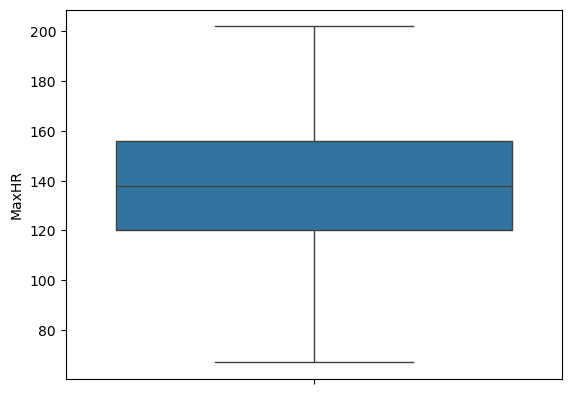

In [66]:
sns.boxplot(df.MaxHR)

##### Oldpeak

In [67]:
stats.iqr(df.Oldpeak)

1.5

In [68]:
IQR_Oldpeak = stats.iqr(df.Oldpeak)

In [69]:
Q1_Oldpeak = np.percentile(df.Oldpeak, 25)
Q3_Oldpeak = np.percentile(df.Oldpeak, 75)
print(Q1_Oldpeak)
print(Q3_Oldpeak)

0.0
1.5


In [70]:
LB_Oldpeak = Q1_Oldpeak - 1.5*(IQR_Oldpeak)
UB_Oldpeak = Q3_Oldpeak + 1.5*(IQR_Oldpeak)
print(LB_Oldpeak)
print(UB_Oldpeak)

-2.25
3.75


In [71]:
df[(df.Oldpeak>LB_Oldpeak) & (df.Oldpeak<UB_Oldpeak)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [72]:
((918-902)/918)*100

1.7429193899782136

<Axes: ylabel='Oldpeak'>

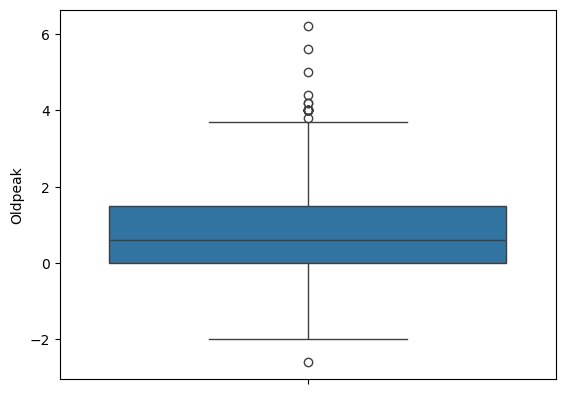

In [73]:
sns.boxplot(df.Oldpeak)

In [74]:
df.Oldpeak.median()

0.6

In [75]:
df.loc[df.Oldpeak > UB_Oldpeak, 'Oldpeak'] = 0.6

In [76]:
df.loc[df.Oldpeak < LB_Oldpeak, 'Oldpeak'] = 0.6

In [77]:
df.loc[df.Oldpeak > UB_Oldpeak, 'Oldpeak']

Series([], Name: Oldpeak, dtype: float64)

In [78]:
df.loc[df.Oldpeak < LB_Oldpeak, 'Oldpeak']

Series([], Name: Oldpeak, dtype: float64)

<Axes: ylabel='Oldpeak'>

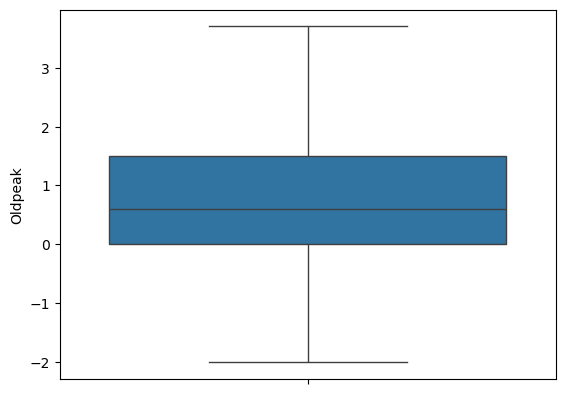

In [79]:
sns.boxplot(df.Oldpeak)

### Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[['Age','RestingBP','Cholesterol','MaxHR']]=scale.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR']])

In [81]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0,0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0,1
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0,0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5,1
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2,1
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4,1
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2,1
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0,1


In [82]:
# Target and predictio separation
X = df.iloc[:,:-1]
y = df.HeartDisease

In [83]:
X

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0


In [84]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [85]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Model Creation

In [86]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

In [87]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8333333333333334

In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       127
           1       0.84      0.85      0.85       149

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



[Text(0.4997829861111111, 0.9642857142857143, 'x[1] <= 0.5\ngini = 0.494\nsamples = 642\nvalue = [285, 357]'),
 Text(0.2686631944444444, 0.8928571428571429, 'x[8] <= 0.5\ngini = 0.305\nsamples = 367\nvalue = [69, 298]'),
 Text(0.3842230902777778, 0.9285714285714286, 'True  '),
 Text(0.08333333333333333, 0.8214285714285714, 'x[12] <= 0.5\ngini = 0.5\nsamples = 54\nvalue = [27, 27]'),
 Text(0.07407407407407407, 0.75, 'x[2] <= 0.5\ngini = 0.489\nsamples = 47\nvalue = [27.0, 20.0]'),
 Text(0.037037037037037035, 0.6785714285714286, 'x[10] <= 0.718\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.018518518518518517, 0.6071428571428571, 'x[9] <= 0.214\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.009259259259259259, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.027777777777777776, 0.5357142857142857, 'x[13] <= 0.289\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.018518518518518517, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')

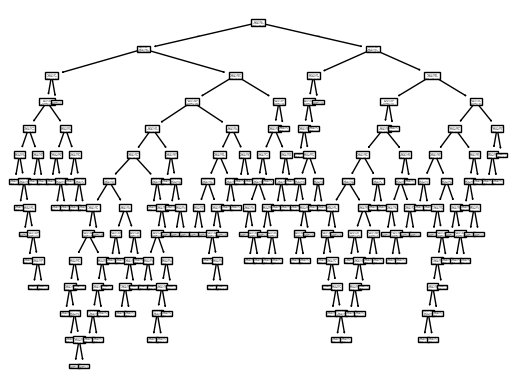

In [89]:
# tree structure
from sklearn import tree
tree.plot_tree(model)

In [90]:
y_pred_train=model.predict(X_train)
accuracy_score(y_pred_train,y_train)

1.0

In [91]:
model=DecisionTreeClassifier(max_depth=3)   #we change maxdepth to get generalized model
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [92]:
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.855072463768116

In [93]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       139
           1       0.82      0.91      0.86       137

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.85       276
weighted avg       0.86      0.86      0.85       276



[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.494\nsamples = 642\nvalue = [285, 357]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\ngini = 0.305\nsamples = 367\nvalue = [69, 298]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[12] <= 0.5\ngini = 0.5\nsamples = 54\nvalue = [27, 27]'),
 Text(0.0625, 0.125, 'gini = 0.489\nsamples = 47\nvalue = [27.0, 20.0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.375, 'x[13] <= 0.619\ngini = 0.232\nsamples = 313\nvalue = [42, 271]'),
 Text(0.3125, 0.125, 'gini = 0.169\nsamples = 268\nvalue = [25, 243]'),
 Text(0.4375, 0.125, 'gini = 0.47\nsamples = 45\nvalue = [17, 28]'),
 Text(0.75, 0.625, 'x[11] <= 0.07\ngini = 0.337\nsamples = 275\nvalue = [216, 59]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[12] <= 0.5\ngini = 0.411\nsamples = 38\nvalue = [11, 27]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.875, 0.375, '

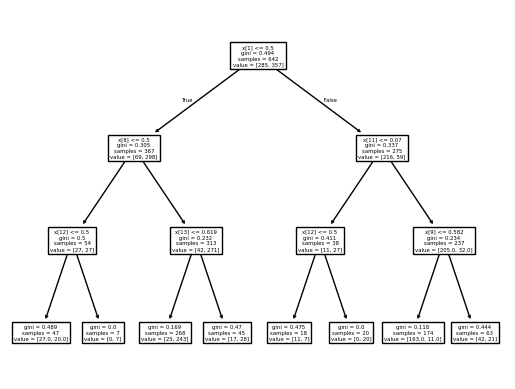

In [94]:
# check tree structure again
from sklearn import tree
tree.plot_tree(model)

In [95]:
y_pred_train=model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8426791277258567

### Feature Selection

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
imp=model.feature_importances_
indices=np.argsort(imp)
features=X_train.columns

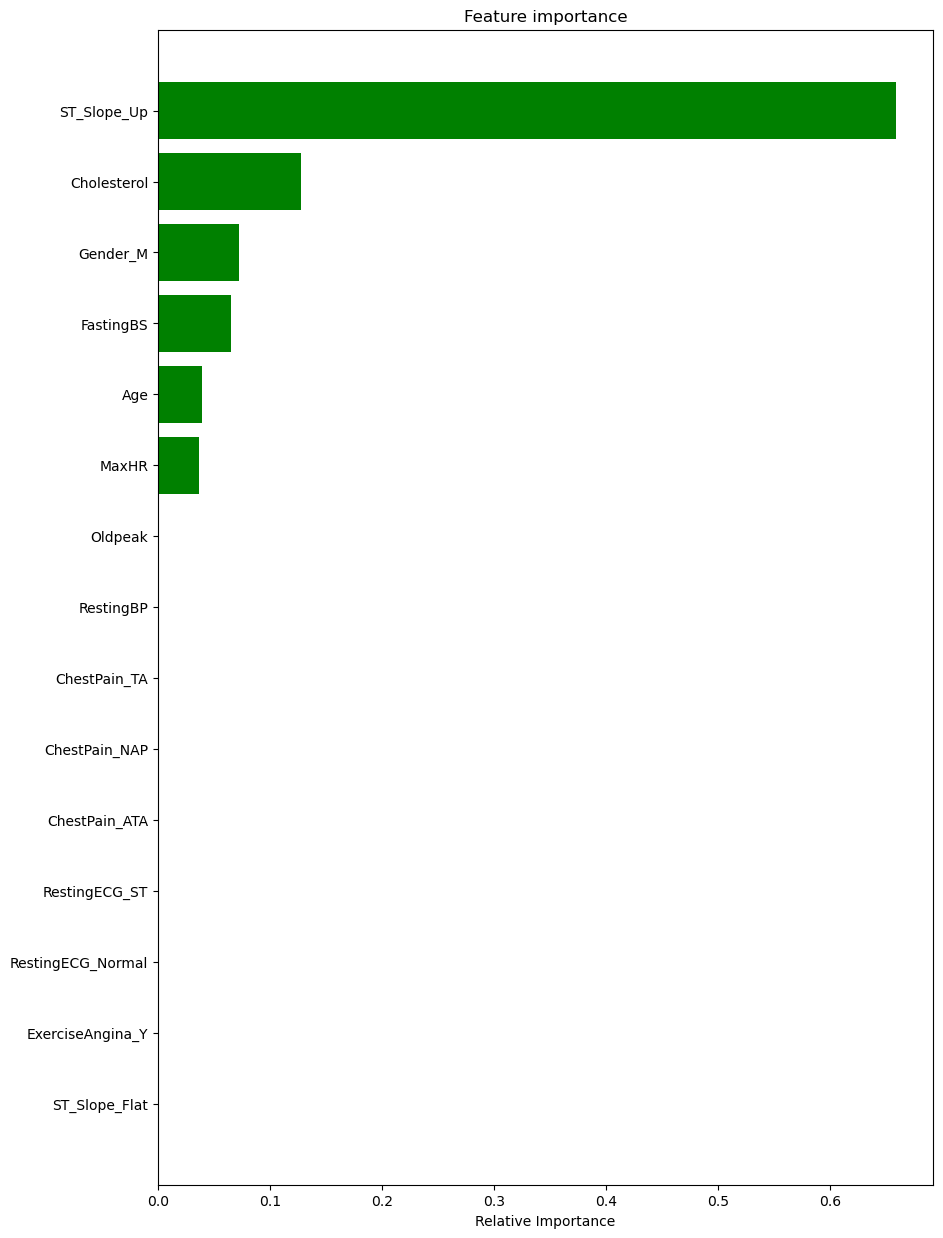

In [98]:
plt.figure(figsize=(10,15))
plt.title("Feature importance")
plt.barh(range(len(indices)),imp[indices],align='center',color='Green')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameter tuning

In [99]:
params={"max_depth":[3,5,9,10,15],
        "criterion":["gini","entropy"]}

In [100]:
## hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(model,param_distributions=params)
rscv.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 15]})

In [101]:
rscv.best_params_

{'max_depth': 3, 'criterion': 'entropy'}

In [102]:
rscv.best_score_

0.823970445736434

In [103]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(model,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 9, 10, 15]})

In [104]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [105]:
gscv.best_score_

0.823970445736434

In [106]:
model=DecisionTreeClassifier(max_depth=3,criterion="entropy")
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [107]:
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.855072463768116

In [108]:
y_pred_train=model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8426791277258567

In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       139
           1       0.82      0.91      0.86       137

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.85       276
weighted avg       0.86      0.86      0.85       276



In [110]:
import joblib

In [111]:
# save model
joblib.dump(model,"decision_tree_model.pkl")

['decision_tree_model.pkl']

### Gradio Interface

In [112]:
! pip install gradio

In [113]:
import gradio as gr
import numpy as np

def predict_heart_disease(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, 
                          RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    # Manual dummy variable encoding (match your model training)
    
    # Binary encodings
    Sex_M = 1 if Sex == "M" else 0
    FastingBS_val = int(FastingBS)  # already 0 or 1
    ExerciseAngina_Y = 1 if ExerciseAngina == "Y" else 0

    # ChestPainType (4 types → 3 dummy vars assuming one dropped or 4 if not)
    ChestPain_ASY = 1 if ChestPainType == "ASY" else 0
    ChestPain_ATA = 1 if ChestPainType == "ATA" else 0
    ChestPain_NAP = 1 if ChestPainType == "NAP" else 0
    ChestPain_TA = 1 if ChestPainType == "TA" else 0  # Only include if used in model

    # RestingECG
    RestingECG_ST = 1 if RestingECG == "ST" else 0
    RestingECG_LVH = 1 if RestingECG == "LVH" else 0

    # ST_Slope
    ST_Slope_Flat = 1 if ST_Slope == "Flat" else 0
    ST_Slope_Up = 1 if ST_Slope == "Up" else 0

    # Form the input in model's expected order (15 features)
    input_data = np.array([[Age, Sex_M, ChestPain_ASY, ChestPain_ATA, ChestPain_NAP,
                            RestingBP, Cholesterol, FastingBS_val, RestingECG_ST, RestingECG_LVH,
                            MaxHR, ExerciseAngina_Y, Oldpeak, ST_Slope_Flat, ST_Slope_Up]])
    
    prediction = model.predict(input_data)
    return "At Risk" if prediction[0] == 1 else "Not at Risk"

# Gradio UI
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(["M", "F"], label="Sex"),
        gr.Dropdown(["ASY", "ATA", "NAP", "TA"], label="Chest Pain Type"),
        gr.Number(label="Resting Blood Pressure"),
        gr.Number(label="Cholesterol"),
        gr.Dropdown(["0", "1"], label="Fasting Blood Sugar > 120 mg/dl"),
        gr.Dropdown(["Normal", "ST", "LVH"], label="Resting ECG"),
        gr.Number(label="Maximum Heart Rate"),
        gr.Dropdown(["Y", "N"], label="Exercise-Induced Angina"),
        gr.Number(label="Oldpeak"),
        gr.Dropdown(["Up", "Flat", "Down"], label="ST Slope")
    ],
    outputs="text",
    title="Heart Disease Risk Predictor",
    description="Enter the values to predict the risk of heart disease."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
